# Matplotlib - Customizing Charts

## 1. Dynamic Charts

---

### Import Packages

In [1]:
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt

%matplotlib inline

### 1.1 `roll_dice()` function

In [2]:
# Simulate rolling dice

def roll_dice(num_dices, size):
    rng = np.random.default_rng()
    
    # Roll the dice
    faces = rng.integers(low = 1, high = 6, endpoint = True, size = (size, num_dices))
    
    # Sum face values
    return np.sum(faces, axis = 1)

### 1.2 Update chart dynamically

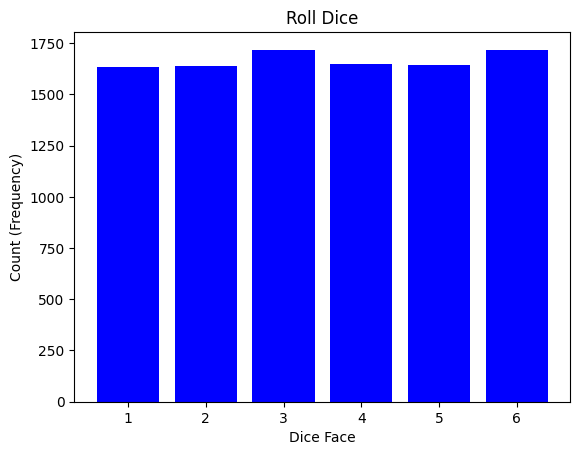

In [3]:
from IPython import display

# Create empty zero-sized numpy array
face_counts = np.array([], dtype = int)

for i in range(0, 100):
    # Roll 1 dice
    dice_faces = roll_dice(1, 100)
    
    # Concatenate the new result to the previous results
    face_counts = np.concatenate((face_counts, dice_faces), axis = 0)
    
    # Plot histogram of all results
    hist = plt.hist(face_counts, bins = np.arange(1, 8) - 0.5, color = 'blue', rwidth = 0.8)
    
    # Set title and axis labels
    plt.title('Roll Dice')
    plt.xlabel('Dice Face')
    plt.ylabel('Count (Frequency)')
    
    # Clear Jupyter display output
    display.clear_output(wait = True)
    
    # Display the active figure
    display.display(plt.gcf())
    
display.clear_output(wait = True)

## 2. Load Data from Dataset File with NumPy

---

### 2.1 Load data from `mpg.csv` dataset file

- This dataset can be downloaded at https://gist.github.com/omarish/5687264

In [4]:
mpg_ds = np.genfromtxt('mpg.csv', delimiter = ',', 
                       names = True, dtype = None, encoding = 'utf-8', 
                       converters = {3: lambda x: float(x.replace('?', '0')),
                                    7: lambda x: x.replace('1', 'USA').replace('2', 'EU').replace('3', 'JP')})

print('shape:', mpg_ds.shape, '\n')
print(mpg_ds[0:10])

shape: (398,) 

[(18., 8, 307., 130., 3504, 12. , 70, 'USA', 'chevrolet chevelle malibu')
 (15., 8, 350., 165., 3693, 11.5, 70, 'USA', 'buick skylark 320')
 (18., 8, 318., 150., 3436, 11. , 70, 'USA', 'plymouth satellite')
 (16., 8, 304., 150., 3433, 12. , 70, 'USA', 'amc rebel sst')
 (17., 8, 302., 140., 3449, 10.5, 70, 'USA', 'ford torino')
 (15., 8, 429., 198., 4341, 10. , 70, 'USA', 'ford galaxie 500')
 (14., 8, 454., 220., 4354,  9. , 70, 'USA', 'chevrolet impala')
 (14., 8, 440., 215., 4312,  8.5, 70, 'USA', 'plymouth fury iii')
 (14., 8, 455., 225., 4425, 10. , 70, 'USA', 'pontiac catalina')
 (15., 8, 390., 190., 3850,  8.5, 70, 'USA', 'amc ambassador dpl')]


### 2.2 Remove records with `horsepower = 0`

In [5]:
mpg_ds = mpg_ds[mpg_ds['horsepower'] > 0]

print('shape:', mpg_ds.shape, '\n')
print(mpg_ds[0:10])

shape: (392,) 

[(18., 8, 307., 130., 3504, 12. , 70, 'USA', 'chevrolet chevelle malibu')
 (15., 8, 350., 165., 3693, 11.5, 70, 'USA', 'buick skylark 320')
 (18., 8, 318., 150., 3436, 11. , 70, 'USA', 'plymouth satellite')
 (16., 8, 304., 150., 3433, 12. , 70, 'USA', 'amc rebel sst')
 (17., 8, 302., 140., 3449, 10.5, 70, 'USA', 'ford torino')
 (15., 8, 429., 198., 4341, 10. , 70, 'USA', 'ford galaxie 500')
 (14., 8, 454., 220., 4354,  9. , 70, 'USA', 'chevrolet impala')
 (14., 8, 440., 215., 4312,  8.5, 70, 'USA', 'plymouth fury iii')
 (14., 8, 455., 225., 4425, 10. , 70, 'USA', 'pontiac catalina')
 (15., 8, 390., 190., 3850,  8.5, 70, 'USA', 'amc ambassador dpl')]


## 3. Plot Charts from mpg Dataset

---

### 3.1 Car model count by origin

Text(0.5, 1.0, 'Car Model Distribution by Origin')

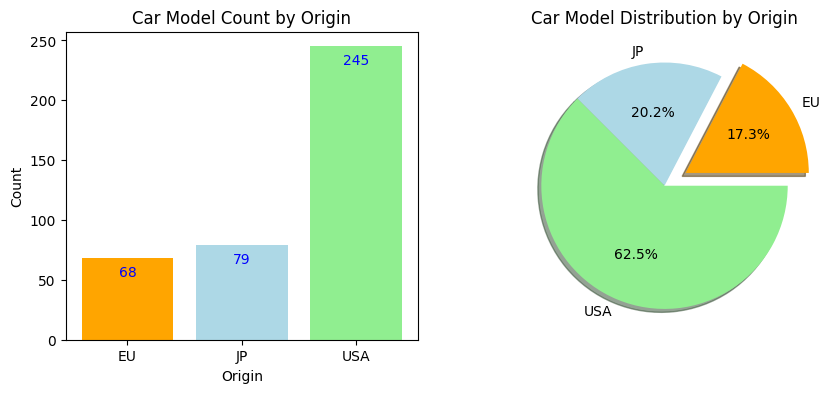

In [6]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))
bar_ax, pie_ax = ax

origins, counts = np.unique(mpg_ds['origin'], return_counts = True)

# Bar chart
bar_chart = bar_ax.bar(origins, counts, color = ['orange', 'lightblue', 'lightgreen'])

# Customize chart attributes
bar_ax.set_title('Car Model Count by Origin')
bar_ax.set_xlabel('Origin')
bar_ax.set_ylabel('Count')

# Customize to add annotation (data label)
for x, y in np.stack((origins, counts), axis = 1):
    y = int(y)
    bar_ax.annotate(y, (x, y), ha = 'center', color = 'blue', xytext = (x, y - 15))
    
pie_chart = pie_ax.pie(counts, labels = origins, colors = ['orange', 'lightblue', 'lightgreen'],
                      autopct = '%1.1f%%', shadow = True, explode = (0.2, 0, 0))
pie_ax.set_title('Car Model Distribution by Origin')

### 3.2 Exploratory Analysis of Car Models Attributes

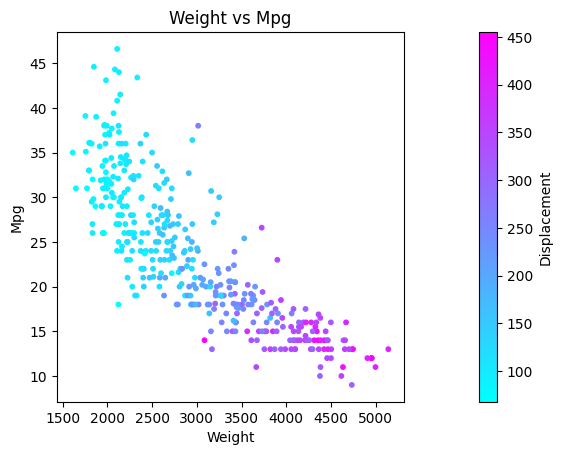

In [10]:
weights = mpg_ds['weight']
mpgs = mpg_ds['mpg']
disps = mpg_ds['displacement']

# Draw scatter chart
scatter_chart = plt.scatter(weights, mpgs, s = 10, c = disps, cmap = 'cool')

plt.title('Weight vs Mpg')
plt.xlabel('Weight')
plt.ylabel('Mpg')

plt.colorbar(scatter_chart, label = 'Displacement',
            orientation = 'vertical', location = 'right',
            pad = 0.15)